# Store Sales - Time Series Forecasting
## Description
### Goal of the Competition
In this “getting started” competition, you’ll use time-series forecasting to forecast store sales on data from Corporación Favorita, a large Ecuadorian-based grocery retailer.

Specifically, you'll build a model that more accurately predicts the unit sales for thousands of items sold at different Favorita stores. 
You'll practice your machine learning skills with an approachable training dataset of dates, store, and item information, promotions, and unit sales.

### Dataset 
In this competition, you will predict sales for the thousands of product families sold at Favorita stores located in Ecuador. The training data includes dates, store and product information, whether that item was being promoted, as well as the sales numbers. Additional files include supplementary information that may be useful in building your models.

### File Descriptions and Data Field Information

#### train.csv
    The training data, comprising time series of features store_nbr, family, and onpromotion as well as the target sales.
    store_nbr identifies the store at which the products are sold.
    family identifies the type of product sold.
    sales gives the total sales for a product family at a particular store at a given date. Fractional values are possible since products can be sold in fractional units (1.5 kg of cheese, for instance, as opposed to 1 bag of chips).
    onpromotion gives the total number of items in a product family that were being promoted at a store at a given date.

#### test.csv
    The test data, having the same features as the training data. You will predict the target sales for the dates in this file.
    The dates in the test data are for the 15 days after the last date in the training data.

#### sample_submission.csv
    A sample submission file in the correct format.

#### stores.csv
    Store metadata, including city, state, type, and cluster.
    cluster is a grouping of similar stores.

#### oil.csv
    Daily oil price. Includes values during both the train and test data timeframes. (Ecuador is an oil-dependent country and it's economical health is highly vulnerable to shocks in oil prices.)

#### holidays_events.csv
    Holidays and Events, with metadata
    NOTE: Pay special attention to the transferred column. A holiday that is transferred officially falls on that calendar day, but was moved to another date by the government. A transferred day is more like a normal day than a holiday. To find the day that it was actually celebrated, look for the corresponding row where type is Transfer. For example, the holiday Independencia de Guayaquil was transferred from 2012-10-09 to 2012-10-12, which means it was celebrated on 2012-10-12. Days that are type Bridge are extra days that are added to a holiday (e.g., to extend the break across a long weekend). These are frequently made up by the type Work Day which is a day not normally scheduled for work (e.g., Saturday) that is meant to payback the Bridge.
    Additional holidays are days added a regular calendar holiday, for example, as typically happens around Christmas (making Christmas Eve a holiday).

#### Additional Notes
    Wages in the public sector are paid every two weeks on the 15 th and on the last day of the month. Supermarket sales could be affected by this.
    A magnitude 7.8 earthquake struck Ecuador on April 16, 2016. People rallied in relief efforts donating water and other first need products which greatly affected supermarket sales for several weeks after the earthquake.


## Setup

In [3]:
import pandas as pd
import numpy as np

import darts
print(darts.__version__)

0.25.0


In [2]:
import warnings
warnings.filterwarnings('ignore')

# Import Data
Our objective is to forecast 16 days sales of 54 stores in Ecuador based on data from the period of January 01, 2013, to August 15, 2017.

### train

In [4]:
df_train = pd.read_csv('data/train.csv')
display(df_train.head())

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [8]:
df_train.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion'], dtype='object')

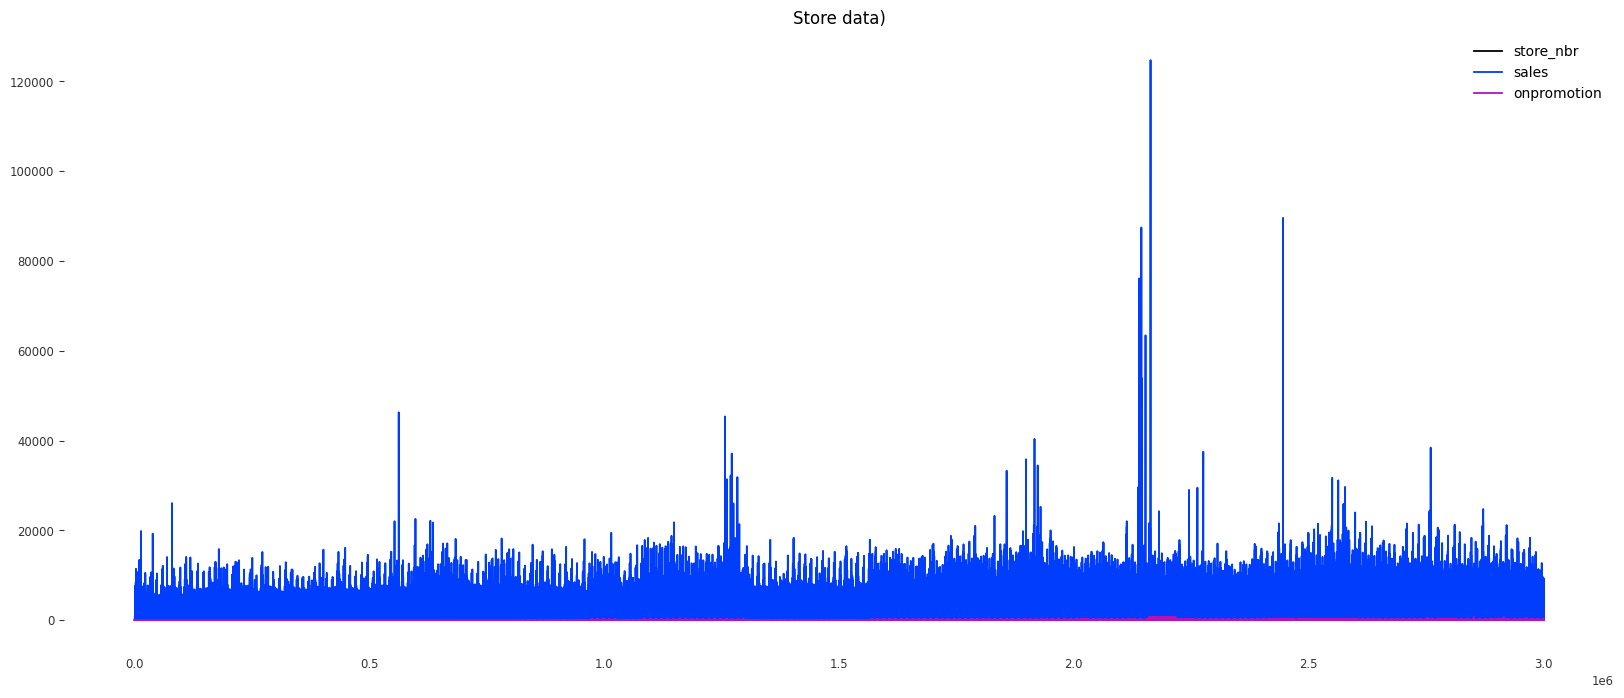

In [9]:
start = "2018-02-12"
end = "2018-03-10"
format = '%Y-%m-%d'

title = f"Store data)"
# title = f"DH (901) data (period: {datetime.strptime(start, format).strftime('%d/%m')}-{datetime.strptime(end, format).strftime('%d/%m')})"

feats = ["store_nbr","family", "sales", "onpromotion"]

fig = df_train.plot(y=feats, figsize=(20,8),  title=title)
fig.grid(which = "both")

Please note that we do not have sales data for December 25 of each year. We will need to fill in the missing data:

In [10]:
df_train.iloc[np.where(df_train['date'].str.contains('12-25'))]

,id,date,store_nbr,family,sales,onpromotion


###  holidays_events

In [11]:
df_holidays_events = pd.read_csv('data/holidays_events.csv')
display(df_holidays_events.head())

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [12]:
df_holidays_events.groupby(['type', 'locale'])['locale_name'].count()

type        locale  
Additional  Local        11
            National     40
Bridge      National      5
Event       National     56
Holiday     Local       137
            National     60
            Regional     24
Transfer    Local         4
            National      8
Work Day    National      5
Name: locale_name, dtype: int64

### oil

In [13]:
df_oil = pd.read_csv('data/oil.csv')
display(df_oil.head())

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


### store

In [14]:
df_stores = pd.read_csv('data/stores.csv')
display(df_stores.head())

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


### transactions

In [15]:
df_transactions = pd.read_csv('data/transactions.csv')
display(df_transactions.head())

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


Note: a transaction is a receipt created after a customer’s purchase

###  test and sample_submission

In [16]:
df_test = pd.read_csv('data/test.csv')
df_sample_submission = pd.read_csv('data/sample_submission.csv')
display(df_test.head())
display(df_sample_submission.head())

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0


# Preprocessing

In [17]:
family_list = df_train['family'].unique()
store_list = df_stores['store_nbr'].unique()
display(family_list)
display(store_list)

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54])

Let's combine the training and test datasets. So we can find covariates and extract IDs for prediction on the test set.

In [ ]:
train_merged = pd.merge(df_train, df_stores, on ='store_nbr')
train_merged = train_merged.sort_values(["store_nbr","family","date"])
train_merged = train_merged.astype({"store_nbr":'str', "family":'str', "city":'str',
                          "state":'str', "type":'str', "cluster":'str'})

display(train_merged.head())

## TimeSeries

In [ ]:
from darts import TimeSeries
from tqdm import tqdm

In [ ]:
family_TS_dict = {}

for family in tqdm(family_list):
    df_family = train_merged.loc[train_merged['family'] == family]

    list_of_TS_family = TimeSeries.from_group_dataframe(
                                df_family,
                                time_col="date",
                                group_cols=["store_nbr","family"], # columns for grouping time series
                                static_cols=["city","state","type","cluster"], # static covariates
                                value_cols="sales", # target
                                fill_missing_dates=True, # filling missing dates, remember Dec 25th
                                freq='D' # days
                                )
    for ts in list_of_TS_family:
            ts = ts.astype(np.float32)

    list_of_TS_family = sorted(list_of_TS_family, key=lambda ts: int(ts.static_covariates_values()[0,0]))
    family_TS_dict[family] = list_of_TS_family

Let's talk more about TimeSeries. This is the main object of the Darts library. Understanding its specifics will greatly simplify the comprehension of the subsequent code. We have created a dictionary with Multivariate TimeSeries
Dictionary structure:

In [ ]:
family_TS_dict.keys()

Timeseries for family 'AUTOMOTIVE' and store_nbr 1
date: number (range) of days in the time series

component: data from the columns that we passed in the parameter 'value_cols'. In our case, the number of daily sales.

In [ ]:
family_TS_dict['AUTOMOTIVE'][0]

Constant values for all observations in the group:

In [ ]:
family_TS_dict['AUTOMOTIVE'][0].static_covariates

We can select specific dates with slicing:

In [ ]:
family_TS_dict['AUTOMOTIVE'][0][:10]

### Normalizing time series
Let's create a pipeline to automate our actions.
We will use the following data preprocessing:
- Filling missing values.
- Encoding of static covariates. In my example, this is Ordinal Encoding. You can use any other one from the sklearn. It must have methods: fit(), transform() , inverse_transform().
- Target variable transformation. log1p significantly improves prediction accuracy.
- Scaler. Default is Min Max Scaler.

In [ ]:
from darts.dataprocessing import Pipeline
from darts.dataprocessing.transformers import Scaler, StaticCovariatesTransformer, MissingValuesFiller, InvertibleMapper
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
family_pipeline_dict = {}
family_TS_transformed_dict = {}

for key in family_TS_dict:
    train_filler = MissingValuesFiller(verbose=False, n_jobs=-1, name="Fill NAs")
    static_cov_transformer = StaticCovariatesTransformer(verbose=False, transformer_cat = OrdinalEncoder(), name="Encoder")
    log_transformer = InvertibleMapper(np.log1p, np.expm1, verbose=False, n_jobs=-1, name="Log-Transform")   
    train_scaler = Scaler(verbose=False, n_jobs=-1, name="Scaling")

    train_pipeline = Pipeline([train_filler,
                             static_cov_transformer,
                             log_transformer,
                             train_scaler])

    training_transformed = train_pipeline.fit_transform(family_TS_dict[key])
    family_pipeline_dict[key] = train_pipeline
    family_TS_transformed_dict[key] = training_transformed

In [ ]:
family_TS_transformed_dict['AUTOMOTIVE'][0][:10]

## Covariates

> **A covariate** is a variable that helps to predict a target variable.

This covariate can be dependent on the target variable. For example, the type of store, `type`, where the sales are made. But it can also be independent. For example, the price of oil on the day of the sale of a product.

This covariate can be known in advance, for example in our dataset we have the price of oil from January 1, 2013 to August 31, 2017. In this case, we talk about a **future covariate**.

There are also **past covariates**. These are covariates that are not known in advance. For example in our dataset, the transactions are known for the dates January 1, 2013 to August 15, 2017.

### Date

In [ ]:
from darts.utils.timeseries_generation import datetime_attribute_timeseries

In [ ]:
full_time_period = pd.date_range(start='2013-01-01', end='2017-08-31', freq='D')


year = datetime_attribute_timeseries(time_index = full_time_period, attribute="year")
month = datetime_attribute_timeseries(time_index = full_time_period, attribute="month")
day = datetime_attribute_timeseries(time_index = full_time_period, attribute="day")
dayofyear = datetime_attribute_timeseries(time_index = full_time_period, attribute="dayofyear")
weekday = datetime_attribute_timeseries(time_index = full_time_period, attribute="dayofweek")
weekofyear = datetime_attribute_timeseries(time_index = full_time_period, attribute="weekofyear")
timesteps = TimeSeries.from_times_and_values(times=full_time_period,
                                             values=np.arange(len(full_time_period)),
                                             columns=["linear_increase"])

time_cov = year.stack(month).stack(day).stack(dayofyear).stack(weekday).stack(weekofyear).stack(timesteps)
time_cov = time_cov.astype(np.float32)

In [ ]:
display(print(time_cov.components.values))
display(time_cov[100])

In [ ]:
time_cov_scaler = Scaler(verbose=False, n_jobs=-1, name="Scaler")
time_cov_train, time_cov_val = time_cov.split_before(pd.Timestamp('20170816'))
time_cov_scaler.fit(time_cov_train)
time_cov_transformed = time_cov_scaler.transform(time_cov)

### Oil

In [ ]:
from darts.models.filtering.moving_average_filter import MovingAverageFilter

In [ ]:
# Oil Price

oil = TimeSeries.from_dataframe(df_oil, 
                                time_col = 'date', 
                                value_cols = ['dcoilwtico'],
                                freq = 'D')

oil = oil.astype(np.float32)

# Transform
oil_filler = MissingValuesFiller(verbose=False, n_jobs=-1, name="Filler")
oil_scaler = Scaler(verbose=False, n_jobs=-1, name="Scaler")
oil_pipeline = Pipeline([oil_filler, oil_scaler])
oil_transformed = oil_pipeline.fit_transform(oil)

# Moving Averages for Oil Price
oil_moving_average_7 = MovingAverageFilter(window=7)
oil_moving_average_28 = MovingAverageFilter(window=28)

oil_moving_averages = []

ma_7 = oil_moving_average_7.filter(oil_transformed).astype(np.float32)
ma_7 = ma_7.with_columns_renamed(col_names=ma_7.components, col_names_new="oil_ma_7")
ma_28 = oil_moving_average_28.filter(oil_transformed).astype(np.float32)
ma_28 = ma_28.with_columns_renamed(col_names=ma_28.components, col_names_new="oil_ma_28")
oil_moving_averages = ma_7.stack(ma_28)

In [ ]:
display(oil_moving_averages[100])

### Holidays

In [ ]:
def holiday_list(df_stores):

    listofseries = []
    
    for i in range(0,len(df_stores)):        
            df_holiday_dummies = pd.DataFrame(columns=['date'])
            df_holiday_dummies["date"] = df_holidays_events["date"]
    
            df_holiday_dummies["national_holiday"] = np.where(((df_holidays_events["type"] == "Holiday") & (df_holidays_events["locale"] == "National")), 1, 0)

            df_holiday_dummies["earthquake_relief"] = np.where(df_holidays_events['description'].str.contains('Terremoto Manabi'), 1, 0)

            df_holiday_dummies["christmas"] = np.where(df_holidays_events['description'].str.contains('Navidad'), 1, 0)

            df_holiday_dummies["football_event"] = np.where(df_holidays_events['description'].str.contains('futbol'), 1, 0)

            df_holiday_dummies["national_event"] = np.where(((df_holidays_events["type"] == "Event") & (df_holidays_events["locale"] == "National") & (~df_holidays_events['description'].str.contains('Terremoto Manabi')) & (~df_holidays_events['description'].str.contains('futbol'))), 1, 0)

            df_holiday_dummies["work_day"] = np.where((df_holidays_events["type"] == "Work Day"), 1, 0)

            df_holiday_dummies["local_holiday"] = np.where(((df_holidays_events["type"] == "Holiday") & ((df_holidays_events["locale_name"] == df_stores['state'][i]) | (df_holidays_events["locale_name"] == df_stores['city'][i]))), 1, 0)
                     
            listofseries.append(df_holiday_dummies)

    return listofseries

In [ ]:
def remove_0_and_duplicates(holiday_list):

    listofseries = []
    
    for i in range(0,len(holiday_list)):         
            df_holiday_per_store = list_of_holidays_per_store[i].set_index('date')

            df_holiday_per_store = df_holiday_per_store.loc[~(df_holiday_per_store==0).all(axis=1)]
            
            df_holiday_per_store = df_holiday_per_store.groupby('date').agg({'national_holiday':'max', 'earthquake_relief':'max', 
                                   'christmas':'max', 'football_event':'max', 
                                   'national_event':'max', 'work_day':'max', 
                                   'local_holiday':'max'}).reset_index()

            listofseries.append(df_holiday_per_store)

    return listofseries

In [ ]:
def holiday_TS_list_54(holiday_list):
    listofseries = []
    
    for i in range(0,54):
            holidays_TS = TimeSeries.from_dataframe(list_of_holidays_per_store[i], 
                                        time_col = 'date',
                                        fill_missing_dates=True,
                                        fillna_value=0,
                                        freq='D')
            
            holidays_TS = holidays_TS.slice(pd.Timestamp('20130101'),pd.Timestamp('20170831'))
            holidays_TS = holidays_TS.astype(np.float32)
            listofseries.append(holidays_TS)

    return listofseries

In [ ]:
list_of_holidays_per_store = holiday_list(df_stores)
list_of_holidays_per_store = remove_0_and_duplicates(list_of_holidays_per_store)   
list_of_holidays_store = holiday_TS_list_54(list_of_holidays_per_store)

holidays_filler = MissingValuesFiller(verbose=False, n_jobs=-1, name="Filler")
holidays_scaler = Scaler(verbose=False, n_jobs=-1, name="Scaler")

holidays_pipeline = Pipeline([holidays_filler, holidays_scaler])
holidays_transformed = holidays_pipeline.fit_transform(list_of_holidays_store)

In [ ]:
display(len(holidays_transformed))
display(holidays_transformed[0].components.values)
display(holidays_transformed[0][100])

### Promotion

In [ ]:
from tqdm import tqdm

In [ ]:
df_promotion = pd.concat([df_train, df_test], axis=0)
df_promotion = df_promotion.sort_values(["store_nbr","family","date"])
df_promotion.tail()

family_promotion_dict = {}

for family in tqdm(family_list):
    df_family = df_promotion.loc[df_promotion['family'] == family]

    list_of_TS_promo = TimeSeries.from_group_dataframe(
                                df_family,
                                time_col="date",
                                group_cols=["store_nbr","family"],
                                value_cols="onpromotion",
                                fill_missing_dates=True,
                                freq='D')

    for ts in list_of_TS_promo:
        ts = ts.astype(np.float32)

    family_promotion_dict[family] = list_of_TS_promo

In [ ]:
display(family_promotion_dict['AUTOMOTIVE'][0])

In [ ]:
promotion_transformed_dict = {}

for key in tqdm(family_promotion_dict):
    promo_filler = MissingValuesFiller(verbose=False, n_jobs=-1, name="Fill NAs")
    promo_scaler = Scaler(verbose=False, n_jobs=-1, name="Scaling")

    promo_pipeline = Pipeline([promo_filler,
                             promo_scaler])

    promotion_transformed = promo_pipeline.fit_transform(family_promotion_dict[key])

    # Moving Averages for Promotion Family Dictionaries
    promo_moving_average_7 = MovingAverageFilter(window=7)
    promo_moving_average_28 = MovingAverageFilter(window=28)

    promotion_covs = []

    for ts in promotion_transformed:
        ma_7 = promo_moving_average_7.filter(ts)
        ma_7 = TimeSeries.from_series(ma_7.pd_series())  
        ma_7 = ma_7.astype(np.float32)
        ma_7 = ma_7.with_columns_renamed(col_names=ma_7.components, col_names_new="promotion_ma_7")
        ma_28 = promo_moving_average_28.filter(ts)
        ma_28 = TimeSeries.from_series(ma_28.pd_series())  
        ma_28 = ma_28.astype(np.float32)
        ma_28 = ma_28.with_columns_renamed(col_names=ma_28.components, col_names_new="promotion_ma_28")
        promo_and_mas = ts.stack(ma_7).stack(ma_28)
        promotion_covs.append(promo_and_mas)

    promotion_transformed_dict[key] = promotion_covs

In [ ]:
display(promotion_transformed_dict['AUTOMOTIVE'][0].components.values)
display(promotion_transformed_dict['AUTOMOTIVE'][0][1])

### Grouping the covariates

In [ ]:
general_covariates = time_cov_transformed.stack(oil_transformed).stack(oil_moving_averages)

In [ ]:
store_covariates_future = []

for store in range(0,len(store_list)):
    stacked_covariates = holidays_transformed[store].stack(general_covariates)  
    store_covariates_future.append(stacked_covariates)

In [ ]:
future_covariates_dict = {}

for key in tqdm(promotion_transformed_dict):
    promotion_family = promotion_transformed_dict[key]
    covariates_future = [promotion_family[i].stack(store_covariates_future[i]) for i in range(0,len(promotion_family))]
    future_covariates_dict[key] = covariates_future

In [ ]:
display(future_covariates_dict['AUTOMOTIVE'][0].components)

### Transactions – Past Covariates

In [ ]:
df_transactions.sort_values(["store_nbr","date"], inplace=True)

TS_transactions_list = TimeSeries.from_group_dataframe(
                                df_transactions,
                                time_col="date",
                                group_cols=["store_nbr"],
                                value_cols="transactions",
                                fill_missing_dates=True,
                                freq='D')

transactions_list = []

for ts in TS_transactions_list:
            series = TimeSeries.from_series(ts.pd_series())
            series = series.astype(np.float32)
            transactions_list.append(series)

transactions_list[24] = transactions_list[24].slice(start_ts=pd.Timestamp('20130102'), end_ts=pd.Timestamp('20170815'))

from datetime import datetime, timedelta

transactions_list_full = []

for ts in transactions_list:
    if ts.start_time() > pd.Timestamp('20130101'):
        end_time = (ts.start_time() - timedelta(days=1))
        delta = end_time - pd.Timestamp('20130101')
        zero_series = TimeSeries.from_times_and_values(
                                  times=pd.date_range(start=pd.Timestamp('20130101'), 
                                  end=end_time, freq="D"),
                                  values=np.zeros(delta.days+1))
        ts = zero_series.append(ts)
        ts = ts.with_columns_renamed(col_names=ts.components, col_names_new="transactions")
        transactions_list_full.append(ts)

transactions_filler = MissingValuesFiller(verbose=False, n_jobs=-1, name="Filler")
transactions_scaler = Scaler(verbose=False, n_jobs=-1, name="Scaler")

transactions_pipeline = Pipeline([transactions_filler, transactions_scaler])
transactions_transformed = transactions_pipeline.fit_transform(transactions_list_full)

In [ ]:
display(transactions_transformed[0])

### Create dataframe with id and reduce memory usage

In [ ]:
df_indexes = pd.concat([df_train, df_test])
df_indexes = df_indexes.drop(['onpromotion'], axis=1)
df_indexes = df_indexes.sort_values(by=['store_nbr','family',])
df_indexes.date = pd.to_datetime(df_indexes.date)
df_indexes.shape

In [ ]:
df_indexes = df_indexes.set_index('date')
df_indexes.head()

In [ ]:
date_range = pd.date_range(start=df_indexes.index.min(), end=df_indexes.index.max(), freq="D")
df_indexes_filled = pd.DataFrame(columns=df_indexes.columns)

for family in tqdm(family_list):
    for store in store_list:
        temp_df = df_indexes.iloc[np.where((df_indexes.family == family)&(df_indexes.store_nbr == store))]
        temp_df = temp_df.reindex(date_range).fillna({'id': np.nan, 'store_nbr': store, 'family':family, 'sales': np.nan})
        df_indexes_filled = pd.concat([df_indexes_filled, temp_df])

df_indexes_filled.head()

In [ ]:
df_indexes_filled.index.name = 'date'
df_indexes_filled = df_indexes_filled.reset_index()
df_indexes_filled = df_indexes_filled.sort_values(['store_nbr', 'family'])
df_indexes_filled.head()

In [ ]:
last_train_date = pd.to_datetime(df_train.date.max())

In [ ]:
import gc

In [ ]:
del(df_train)
del(df_test)
del(df_stores)
del(df_holidays_events)
del(df_oil)
del(df_transactions)
del(df_indexes)
del(train_merged)

gc.collect()

# Model

In [ ]:
from darts.models import LightGBMModel

We will use a general predictions function for blending and stacking.

In [ ]:
'''
The function takes two arguments as input:
model_params: model hyperparameters, tuning them can improve prediction accuracy.
val_df_size: number of days in the validation set. The parameter is needed to determine
the size of the validation sample in the stacking. For blending, set the default value to zero.
'''

def lgbm_predictions(model_params, val_df_size = 0):
    l_train_date = last_train_date - np.timedelta64(val_df_size, 'D')
    local_df_indexes = df_indexes_filled.iloc[np.where(df_indexes_filled.date > l_train_date)]
    
    submission_kaggle_list = []    
    cnt = 1
    
    for params in model_params:
        LGBM_Models_Submission = {}
        display("Training...")
            
        # Fit Model
        print(f'Start fit model {cnt}')
        for family in tqdm(family_list):        
            sales_family = family_TS_transformed_dict[family]
            # training_data: represents the number of sales in the training sample minus the sales for the val
            training_data = [ts[:1688-val_df_size] for ts in sales_family]
            # TCN_covariates: represents the future covariates associated with the target product family
            TCN_covariates = future_covariates_dict[family]
            # train_sliced: represents the number of sales associated with the target product family.
            # slice_intersect: function that you can see used simply ensures that the components span the same time interval. 
            # In the case of different time intervals an error message will appear if we try to combine them.
            train_sliced = [training_data[i].slice_intersect(TCN_covariates[i]) for i in range(0,len(training_data))]
            

            LGBM_Model_Submission = LightGBMModel(lags = params["lags"],
                                                  lags_future_covariates = params["lags_future_covariates"],
                                                  lags_past_covariates = params["lags_past_covariates"],
                                                  output_chunk_length=1,
                                                  random_state=2022,
                                                  gpu_use_dp= "false")


            LGBM_Model_Submission.fit(series=train_sliced, 
                                  future_covariates=TCN_covariates,
                                  # transactions_transformed: the past covariates do not need to be indexed on the target 
                                  # family because there is only one global `TimeSeries` per store.
                                  past_covariates=transactions_transformed)

            LGBM_Models_Submission[family] = LGBM_Model_Submission

        display("Predictions...")
        LGBM_Forecasts_Families_Submission = {}

        # Predict
        print(f'Start predict model {cnt}')
        for family in tqdm(family_list):
            sales_family = family_TS_transformed_dict[family]
            training_data = [ts[:1688-val_df_size] for ts in sales_family]
            LGBM_covariates = future_covariates_dict[family]
            train_sliced = [training_data[i].slice_intersect(TCN_covariates[i]) for i in range(0,len(training_data))]

            forecast_LGBM = LGBM_Models_Submission[family].predict(
                                                  n= 16 + val_df_size,
                                                  series=train_sliced,
                                                  future_covariates=LGBM_covariates,
                                                  past_covariates=transactions_transformed
                                                 )

            LGBM_Forecasts_Families_Submission[family] = forecast_LGBM

        # Transform Back
        print(f'Start transform Back {cnt}')
        LGBM_Forecasts_Families_back_Submission = {}

        for family in tqdm(family_list):
            LGBM_Forecasts_Families_back_Submission[family] = family_pipeline_dict[family].inverse_transform(LGBM_Forecasts_Families_Submission[family], partial=True)

        # Prepare Submission in Correct Format
        print(f'Start Prepare Submission {cnt}')
        for family in tqdm(LGBM_Forecasts_Families_back_Submission):
            for n in range(0,len(LGBM_Forecasts_Families_back_Submission[family])):
                if (family_TS_dict[family][n].univariate_values()[-21:] == 0).all():
                    LGBM_Forecasts_Families_back_Submission[family][n] = LGBM_Forecasts_Families_back_Submission[family][n].map(lambda x: x * 0)

        listofseries = []

        for store in tqdm(range(0,54)):
            for family in family_list:
                oneforecast = LGBM_Forecasts_Families_back_Submission[family][store].pd_dataframe()
                oneforecast.columns = ['y_pred']
                listofseries.append(oneforecast)

        df_forecasts = pd.concat(listofseries) 
        df_forecasts.reset_index(drop=True, inplace=True)

        # No Negative Forecasts
        print(f'Start No Negative Forecasts {cnt}')
        df_forecasts[df_forecasts < 0] = 0
        forecasts_kaggle = pd.concat([local_df_indexes['id'], df_forecasts.set_index(local_df_indexes.index)], axis=1)
        forecasts_kaggle = forecasts_kaggle.reset_index(drop=True)

        # Submission
        print(f'Start Submission {cnt}')
        submission_kaggle_list.append(forecasts_kaggle)
        cnt += 1
    
    return submission_kaggle_list, local_df_indexes

# Blending
The idea of blending is extremely simple and intuitive, which does not prevent the technique from showing good results.

Suppose if one model makes an error in one direction, then another model can correct this error if its predictions are biased in the other direction.

As a result, the mean value of the predictions may be closer to the true value than the predictions of individual models.

However, it should be noted that averaging the results of models can only be effective if the models are diverse and independent of each other.

If the models are highly correlated or have similar errors, averaging may not provide a meaningful improvement.

Let's set significantly different model hyperparameters to reduce the chance of error correlation:

In [ ]:
model_params = [
    {"lags" : 63, "lags_future_covariates" : (14,1), "lags_past_covariates" : [-16,-17,-18,-19,-20,-21,-22]},
    {"lags" : 7, "lags_future_covariates" : (16,1), "lags_past_covariates" : [-16,-17,-18,-19,-20,-21,-22]},  
    {"lags" : 31, "lags_future_covariates" : (14,1), "lags_past_covariates" : [-16,-17,-18,-19,-20,-21,-22]},
    {"lags" : 365, "lags_future_covariates" : (14,1), "lags_past_covariates" : [-16,-17,-18,-19,-20,-21,-22]}, 
    {"lags" : 730, "lags_future_covariates" : (14,1), "lags_past_covariates" : [-16,-17,-18,-19,-20,-21,-22]}, 
    {"lags" : 1095, "lags_future_covariates" : (14,1), "lags_past_covariates" : [-16,-17,-18,-19,-20,-21,-22]}
]

In [ ]:
submission_kaggle_list, clipped_indexes = lgbm_predictions(model_params)

We average the obtained predictions:

In [ ]:
submissions = submission_kaggle_list[0].copy()
submissions = submissions.rename(columns={'y_pred': 'y_pred_0'})

if len(submission_kaggle_list) > 1:
    for i in range(1, len(submission_kaggle_list)):
        y_pred = submission_kaggle_list[i]
        y_pred = y_pred.rename(columns={'y_pred': f'y_pred_{i}'})
        submissions = pd.concat([submissions, y_pred.drop(['id'], axis=1)], axis=1)

submissions['sales'] = submissions.loc[:, submissions.columns!='id'].mean(axis=1)
submissions.head()

In [ ]:
submission = submissions[['id', 'sales']]
submission = submission.sort_values('id')
submission.id = submission.id.astype('int32')
submission.head()

In [ ]:
submission.to_csv('/kaggle/working/submission.csv', index=False)

# Stacking

Stacking is also an ensemble learning method, but it is based on a slightly different approach.
The idea sounds like this - let's use the predictions of weak and maximally different models as predictors of the meta-model.

We will split the training dataset into training and validation data.
Darts models will be trained on the training data and make predictions for the validation and test data.

In [ ]:
val_df_size = 100
submission_kaggle_list, clipped_indexes = lgbm_predictions(model_params, val_df_size)

In [ ]:
submissions = submission_kaggle_list[0].copy()
submissions = submissions.rename(columns={'y_pred': 'y_pred_0'})

if len(submission_kaggle_list) > 1:
    for i in range(1, len(submission_kaggle_list)):
        y_pred = submission_kaggle_list[i]
        y_pred = y_pred.rename(columns={'y_pred': f'y_pred_{i}'})
        submissions = pd.concat([submissions, y_pred.drop(['id'], axis=1)], axis=1)

submissions.head()

In [ ]:
clipped_indexes.head()

In [ ]:
submissions = pd.concat([submissions, clipped_indexes[['date', 'sales']].reset_index(drop=True)], axis=1)
submissions.head()

In [ ]:
del(submission_kaggle_list)
del(df_indexes_filled)
del(clipped_indexes)

gc.collect()

Retrieve future covariates data from the TimeSeries:

In [ ]:
future_covariates_df = pd.DataFrame(columns=['store_nbr', 'family'] + list(future_covariates_dict['AUTOMOTIVE'][0].columns))

for store in tqdm(range(0, 54)):
    for family in list(family_TS_dict.keys()):
        fut_cov_temp = pd.DataFrame(future_covariates_dict[family][store][1688-val_df_size:].values(),
                                    index=future_covariates_dict[family][store].time_index[1688-val_df_size:],
                                    columns=future_covariates_dict[family][store].columns)
        fut_cov_temp['store_nbr'] = store + 1
        fut_cov_temp['family'] = family
        future_covariates_df = pd.concat([future_covariates_df, fut_cov_temp])
        
future_covariates_df.head()

Enrich model predictions with future covariate data:

In [ ]:
data_with_preds = pd.concat([submissions, future_covariates_df.reset_index(drop=True)], axis=1)
data_with_preds = data_with_preds.set_index('date')
data_with_preds.head()

In [ ]:
data_with_preds.store_nbr = data_with_preds.store_nbr.astype('int32')

Let's create a validation and test dataset.

The meta-model will use the predictions as training parameters and will attempt to identify dependencies between the predictions and the original targets.

In [ ]:
val = data_with_preds.iloc[np.where(data_with_preds.index < '2017-08-16')]
test = data_with_preds.iloc[np.where(data_with_preds.index >= '2017-08-16')]
print(val.index.min(), val.index.max())
print(test.index.min(), test.index.max())

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
feature_cols = list(val.columns.drop(['id', 'sales', 'family']))

In [ ]:
result = pd.DataFrame(columns=['id', 'sales'])

for family in tqdm(family_list):
    temp_val = val.iloc[np.where(val.family.values == family)]
    temp_test = test.iloc[np.where(test.family.values == family)]

    temp_val['sales'] = np.log1p(temp_val['sales'])

    lgbm = LGBMRegressor()
    lgbm.fit(temp_val[feature_cols], temp_val['sales'])
    y_pred = lgbm.predict(temp_test[feature_cols])
    y_pred = np.expm1(y_pred)

    temp_test = pd.concat([temp_test['id'].reset_index(drop=True), pd.Series(y_pred, name='sales')], axis=1)
    result = pd.concat([result, temp_test])

result['sales'][result['sales'] < 0] = 0

In [ ]:
submission_stack = result.sort_values('id')
submission_stack.id = submission_stack.id.astype('int32')
submission_stack.head()

In [ ]:
submission_stack.to_csv('/kaggle/working/submission_stack.csv', index=False)